In [ ]:
pip install librosa soundfile

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import soundfile as sf

# Load audio
y, sr = librosa.load("birds_singing_in_garden_9_Ffb_RL5.wav", sr=None)

# Compute STFT
S = librosa.stft(y)

# Convert to magnitude spectrogram
S_magnitude = np.abs(S)


In [6]:
# Reshape the spectrogram for PCA (combine frequency and time axes)
S_flat = S_magnitude.T  # Transpose to apply PCA on time-axis (shape: time x frequency)

# Apply PCA
k = 50  # Number of principal components
pca = PCA(n_components=k)
S_compressed = pca.fit_transform(S_flat)

# Restore the reduced spectrogram
S_reconstructed_flat = pca.inverse_transform(S_compressed)

# Reshape back to the original spectrogram shape
S_reconstructed = S_reconstructed_flat.T


In [ ]:
# Combine with original phase information
S_restored = S_reconstructed * np.exp(1j * np.angle(S))

# Inverse STFT
y_restored = librosa.istft(S_restored)

# Save the restored audio
sf.write("restored_audio.wav", y_restored, sr)


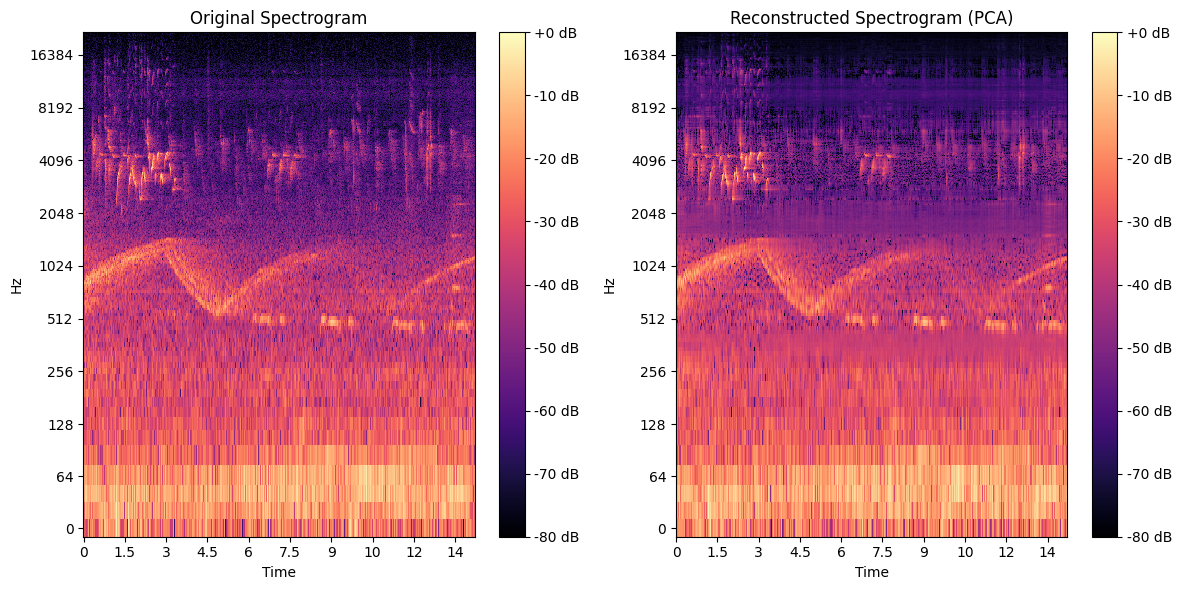

In [ ]:
# Original spectrogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
librosa.display.specshow(librosa.amplitude_to_db(S_magnitude, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.title("Original Spectrogram")
plt.colorbar(format="%+2.0f dB")

# Reconstructed spectrogram
plt.subplot(1, 2, 2)
librosa.display.specshow(librosa.amplitude_to_db(S_reconstructed, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.title("Reconstructed Spectrogram (PCA)")
plt.colorbar(format="%+2.0f dB")
plt.tight_layout()
plt.show()